In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

Reading Data

In [2]:
train=pd.read_csv("G:\\python\\loan\\train.csv")
test=pd.read_csv("G:\\python\\loan\\test.csv")

In [3]:
print(train.shape)
print(test.shape)

(614, 13)
(367, 12)


In [4]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [5]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train.drop("Loan_ID", axis = 1, inplace = True)


In [7]:
test.drop("Loan_ID",axis = 1, inplace = True)

In [8]:
print(train.shape)
print(test.shape)

(614, 12)
(367, 11)


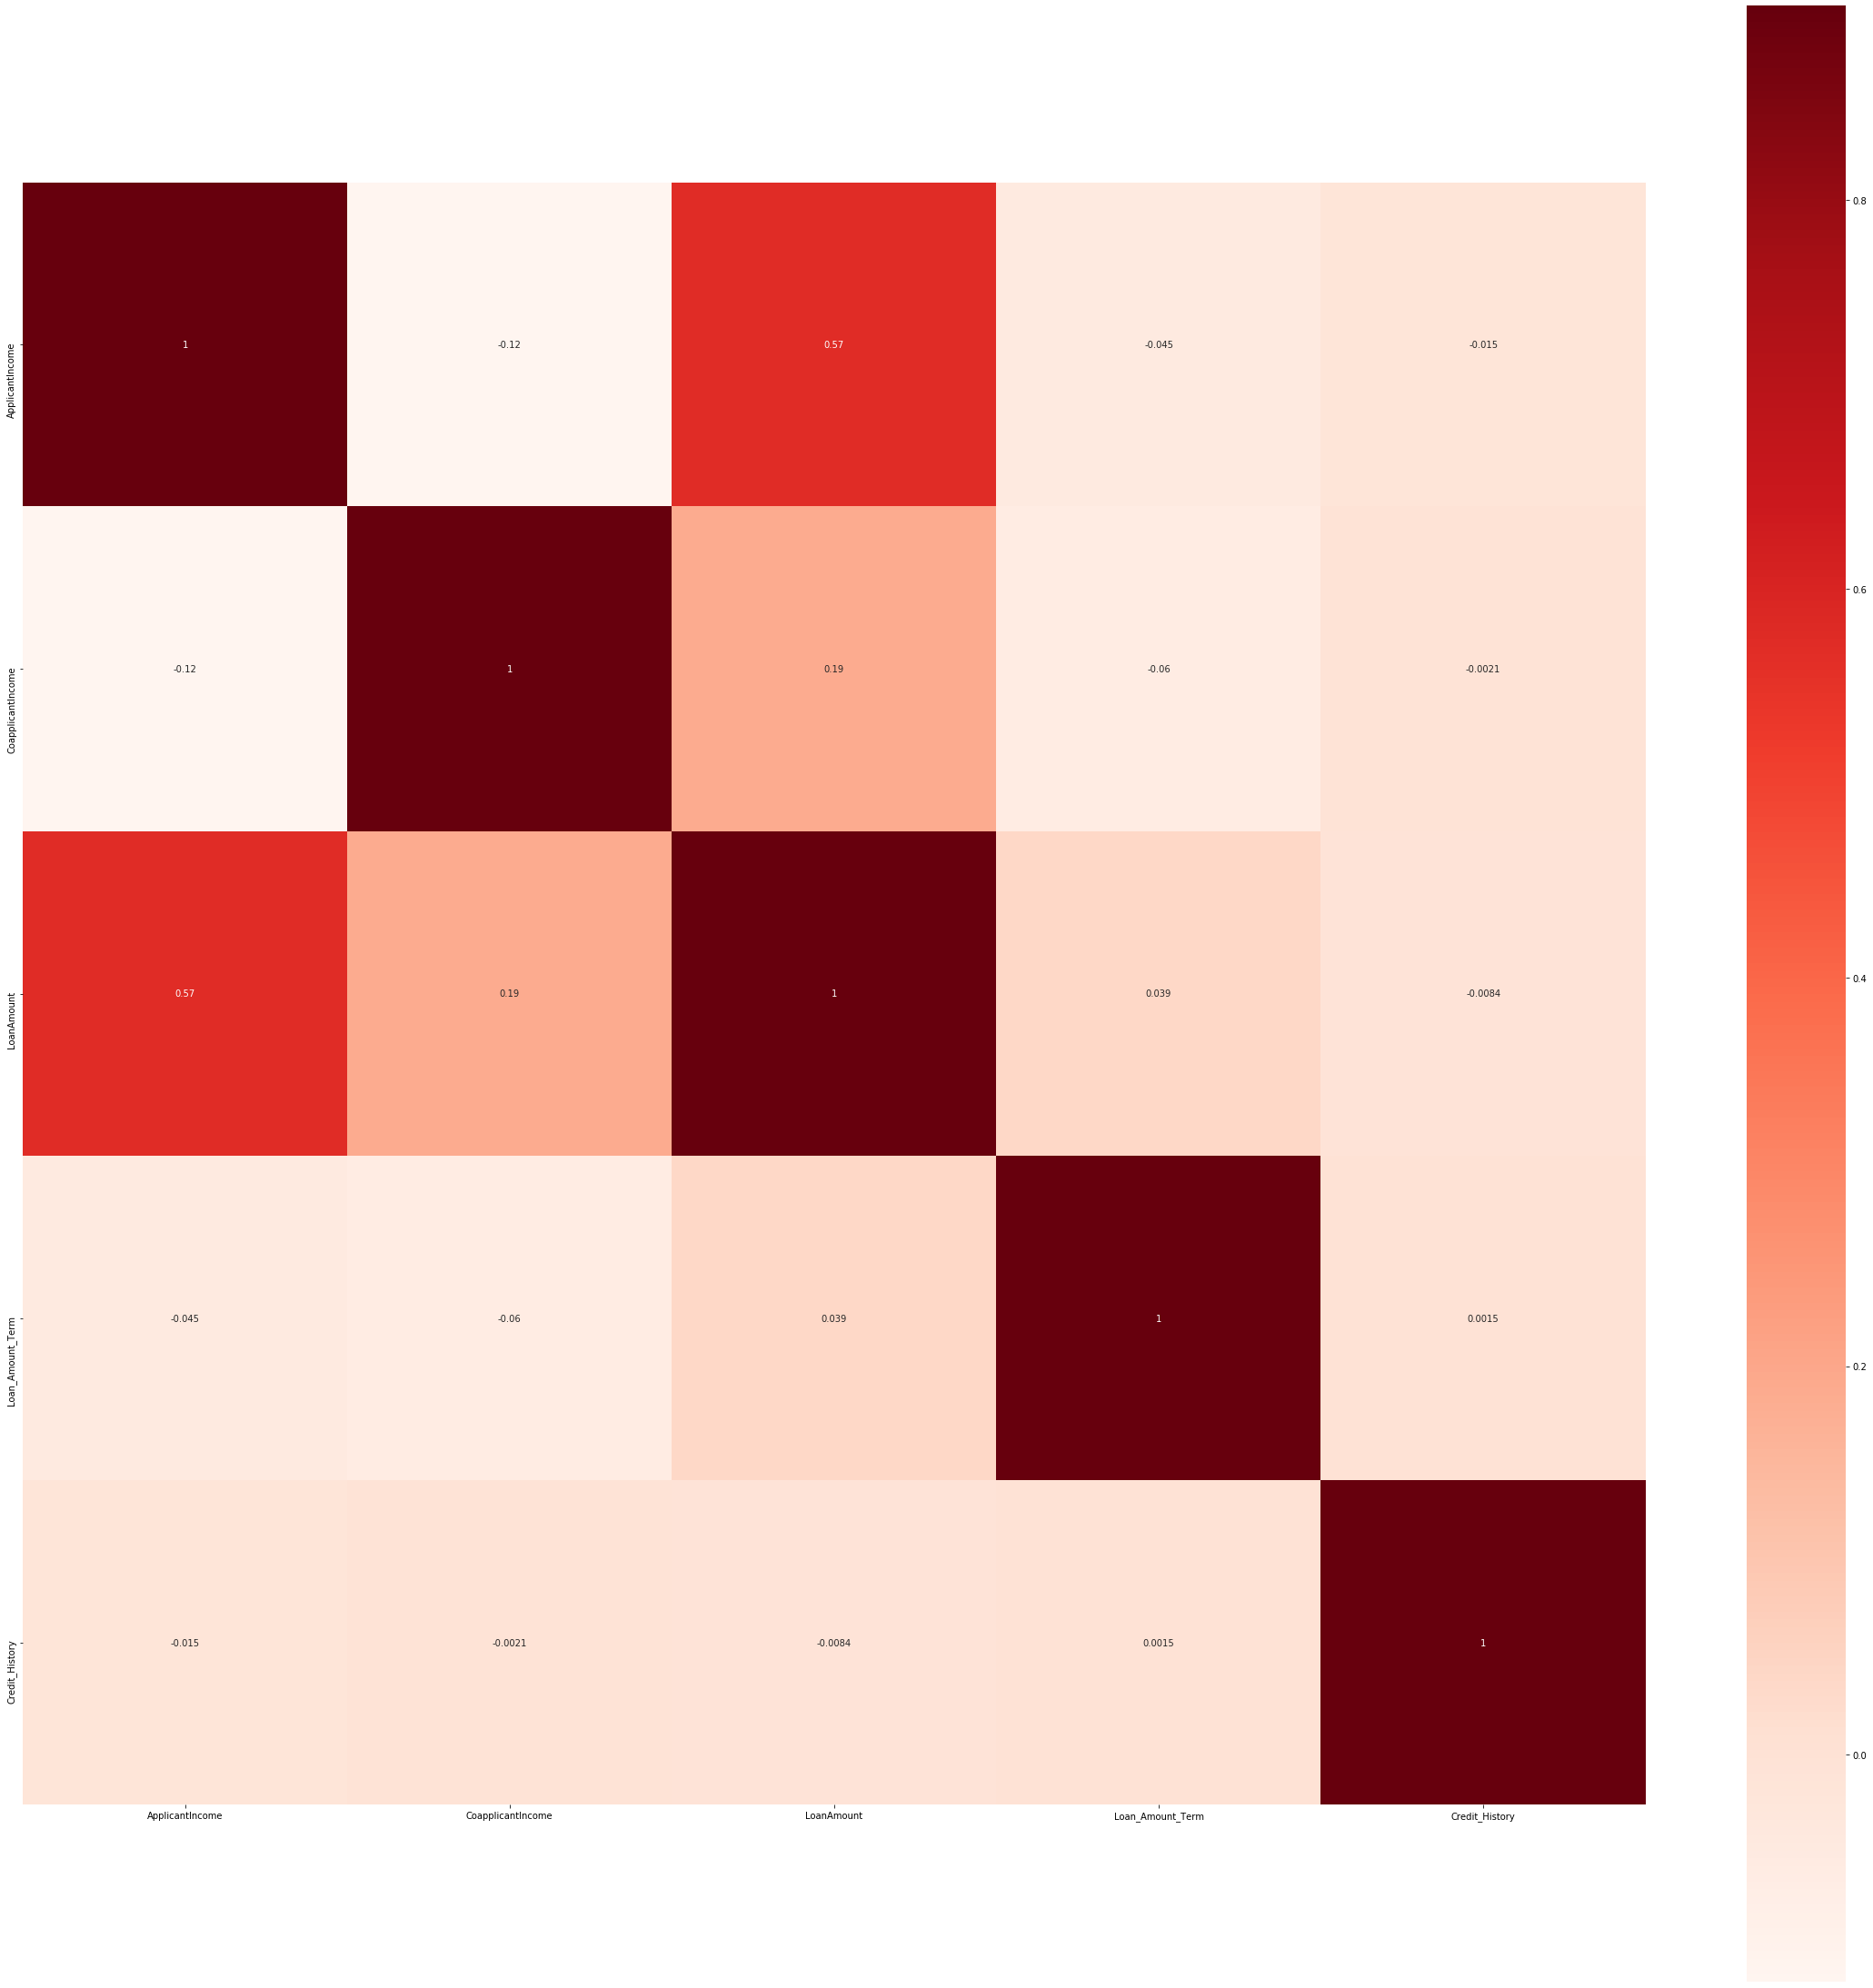

In [9]:
# looking for the corr between vars and sale price
corrmat = train.corr()
plt.subplots(figsize=(40,40))
sns.heatmap(corrmat, vmax=0.9, cmap=plt.cm.Reds, annot = True, square=True)

In [10]:
corrmat

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


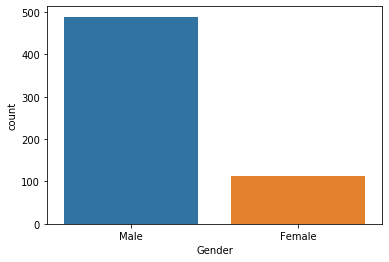

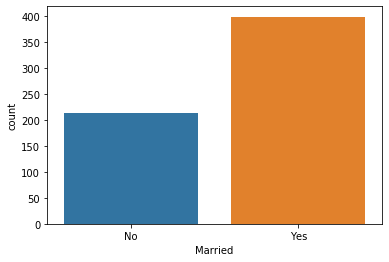

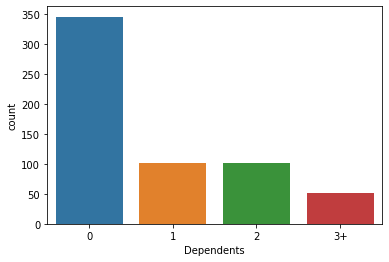

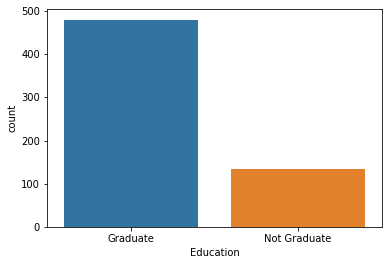

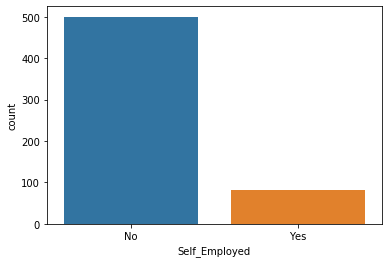

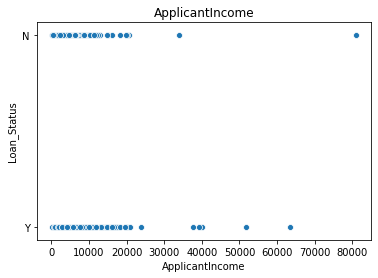

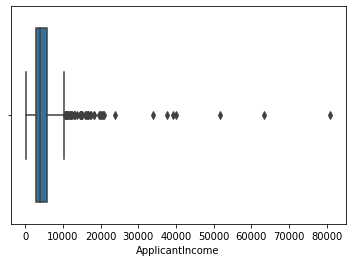

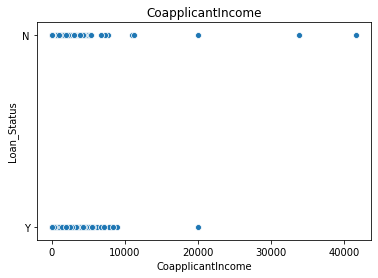

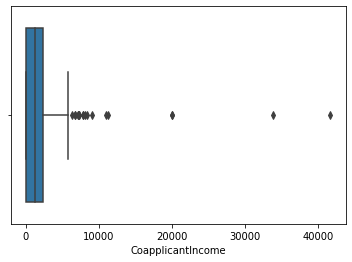

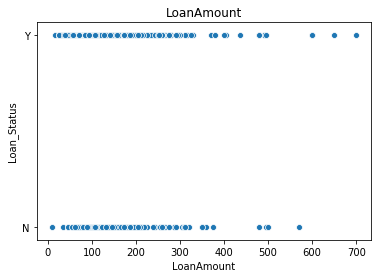

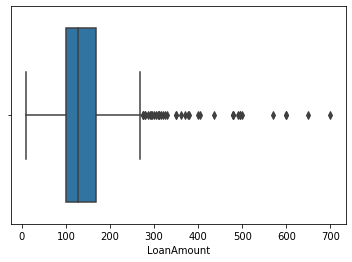

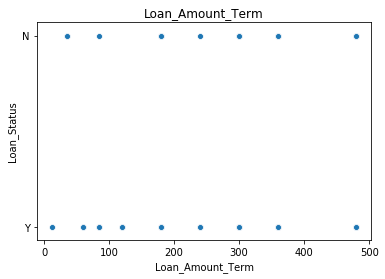

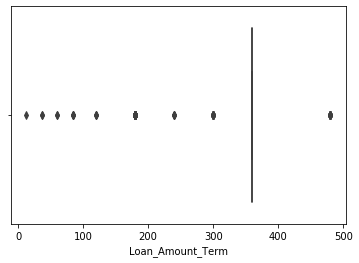

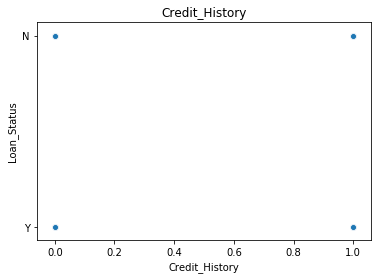

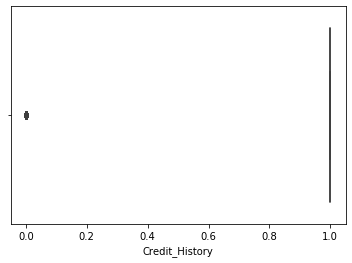

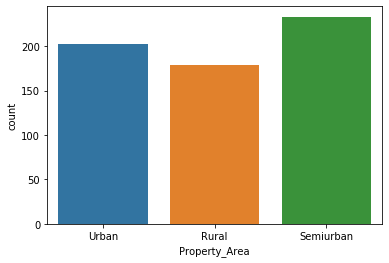

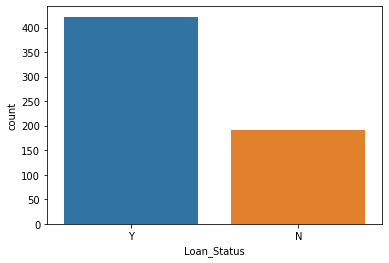

In [11]:
for i in train:
    if train[i].dtypes != 'object':
        plt.title(i)
        sns.scatterplot(x = train[i], y = train['Loan_Status'])
        plt.xlabel(i)
        plt.ylabel('Loan_Status')
        plt.show()
        sns.boxplot(train[i])
        plt.show()
    else:
        sns.countplot(train[i])
        plt.show()

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


treating null values

In [13]:
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
train["Gender"].fillna("NaN", inplace = True)
train["Married"].fillna("NaN", inplace = True)
train["Dependents"].fillna("NaN", inplace = True)
train["Self_Employed"].fillna("NaN", inplace = True)
train["Credit_History"].fillna("NaN", inplace = True)

In [15]:
train["LoanAmount"].fillna(train["LoanAmount"].mean(), inplace=True)
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].median(), inplace=True)

In [16]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Treatment of Outliers

In [17]:
sorted(train["ApplicantIncome"])

[150,
 210,
 416,
 645,
 674,
 1000,
 1025,
 1025,
 1299,
 1378,
 1442,
 1500,
 1538,
 1600,
 1625,
 1668,
 1759,
 1782,
 1800,
 1800,
 1809,
 1811,
 1820,
 1820,
 1828,
 1830,
 1836,
 1853,
 1863,
 1875,
 1880,
 1907,
 1916,
 1926,
 1928,
 1958,
 1958,
 1963,
 1977,
 1993,
 2000,
 2014,
 2014,
 2031,
 2045,
 2058,
 2060,
 2071,
 2083,
 2083,
 2130,
 2132,
 2137,
 2138,
 2149,
 2165,
 2167,
 2178,
 2192,
 2213,
 2213,
 2214,
 2221,
 2237,
 2239,
 2253,
 2275,
 2281,
 2297,
 2301,
 2309,
 2330,
 2333,
 2333,
 2333,
 2346,
 2366,
 2378,
 2378,
 2383,
 2383,
 2395,
 2400,
 2400,
 2400,
 2400,
 2423,
 2425,
 2435,
 2439,
 2454,
 2473,
 2479,
 2479,
 2483,
 2484,
 2491,
 2492,
 2499,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2500,
 2507,
 2510,
 2526,
 2550,
 2577,
 2583,
 2583,
 2583,
 2583,
 2600,
 2600,
 2600,
 2600,
 2600,
 2600,
 2609,
 2620,
 2625,
 2645,
 2647,
 2653,
 2661,
 2666,
 2666,
 2667,
 2679,
 2698,
 2699,
 2708,
 2717,
 2718,
 2720,
 2726,
 2750,
 2755,
 276

In [18]:
q1, q3= np.percentile(train["ApplicantIncome"],[25,75])
iqr = q3 - q1

In [19]:
lower_bound = q1 -(1.5 * iqr)
print(lower_bound)
upper_bound = q3 +(1.5 * iqr)
print(upper_bound)

-1498.75
10171.25


In [20]:
train[train["ApplicantIncome"]>10171.25]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1,Semiurban,N
34,Male,No,3+,Graduate,No,12500,3000.0,320.000000,360.0,1,Rural,N
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.000000,360.0,0,Urban,N
67,Male,Yes,1,Graduate,No,10750,0.0,312.000000,360.0,1,Urban,Y
102,Male,Yes,NaN,Graduate,No,13650,0.0,146.412162,360.0,1,Urban,Y
106,Male,Yes,2,Graduate,No,11417,1126.0,225.000000,360.0,1,Urban,Y
115,Male,Yes,1,Graduate,No,14583,0.0,185.000000,180.0,1,Rural,Y
119,Female,No,0,Graduate,No,10408,0.0,259.000000,360.0,1,Urban,Y
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.000000,360.0,1,Rural,Y
128,Male,Yes,1,Graduate,Yes,10513,3850.0,160.000000,180.0,0,Urban,N


In [21]:
sorted(train["CoapplicantIncome"])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [22]:
q1, q3= np.percentile(train["CoapplicantIncome"],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
print(lower_bound)
upper_bound = q3 +(1.5 * iqr)
print(upper_bound)

-3445.875
5743.125


In [23]:
train[train["CoapplicantIncome"]>5743.125]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N
12,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1,Urban,Y
38,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1,Urban,Y
122,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0,Semiurban,Y
135,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1,Semiurban,N
177,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0,Semiurban,N
180,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0,Urban,N
253,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1,Semiurban,Y
349,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1,Rural,Y
372,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1,Rural,Y


In [24]:
sorted(train["LoanAmount"])

[9.0,
 17.0,
 25.0,
 25.0,
 26.0,
 30.0,
 30.0,
 35.0,
 36.0,
 40.0,
 40.0,
 42.0,
 44.0,
 44.0,
 45.0,
 45.0,
 46.0,
 47.0,
 48.0,
 50.0,
 50.0,
 50.0,
 50.0,
 53.0,
 54.0,
 55.0,
 55.0,
 55.0,
 55.0,
 56.0,
 56.0,
 58.0,
 59.0,
 60.0,
 60.0,
 60.0,
 60.0,
 61.0,
 62.0,
 63.0,
 65.0,
 66.0,
 66.0,
 66.0,
 66.0,
 67.0,
 67.0,
 67.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 73.0,
 74.0,
 74.0,
 74.0,
 75.0,
 75.0,
 75.0,
 76.0,
 76.0,
 78.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 80.0,
 81.0,
 81.0,
 81.0,
 81.0,
 81.0,
 81.0,
 83.0,
 84.0,
 84.0,
 84.0,
 84.0,
 85.0,
 86.0,
 87.0,
 87.0,
 88.0,
 88.0,
 88.0,
 88.0,
 89.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 93.0,
 93.0,
 93.0,
 94.0,
 94.0,
 94.0,
 94.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 95.0,
 96.0,
 96.0,
 96.0,
 96.0,
 96.0,
 96.0,
 96.0,
 96.0,
 96.0,
 97.0,
 97.0,
 98.0,
 98.0,
 98.0,
 98.0,
 99.0,
 99.0,
 99.0,
 99.0,
 100.0,
 100.0,
 100.0,
 100

In [25]:
q1, q3= np.percentile(train["LoanAmount"],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
print(lower_bound)
upper_bound = q3 +(1.5 * iqr)
print(upper_bound)

3.5
261.5


In [26]:
train[train["LoanAmount"]>261.5]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N
21,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1,Urban,Y
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1,Rural,N
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0,Urban,N
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1,Urban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
126,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1,Rural,Y
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
135,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1,Semiurban,N


In [27]:
sorted(train["Loan_Amount_Term"])

[12.0,
 36.0,
 36.0,
 60.0,
 60.0,
 84.0,
 84.0,
 84.0,
 84.0,
 120.0,
 120.0,
 120.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 180.0,
 240.0,
 240.0,
 240.0,
 240.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 300.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 360.0,
 

In [28]:
q1, q3= np.percentile(train["Loan_Amount_Term"],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr)
print(lower_bound)
upper_bound = q3 +(1.5 * iqr)
print(upper_bound)

360.0
360.0


In [29]:
train[train["Loan_Amount_Term"]>360.0]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1,Urban,N
109,Male,Yes,3+,Not Graduate,No,2071,754.0,94.0,480.0,1,Semiurban,Y
130,Male,No,0,Graduate,Yes,20166,0.0,650.0,480.0,NaN,Urban,Y
168,Male,No,0,Graduate,No,2237,0.0,63.0,480.0,0,Semiurban,N
179,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0,Urban,N
228,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1,Semiurban,Y
248,Male,Yes,1,Graduate,No,2882,1843.0,123.0,480.0,1,Semiurban,Y
293,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0,Urban,N
298,Female,No,0,Graduate,No,5000,2541.0,151.0,480.0,1,Rural,N
358,Male,Yes,0,Not Graduate,No,3000,1666.0,100.0,480.0,0,Urban,N


In [30]:
print(train.shape)

(614, 12)


check duplicate value

In [31]:
train[train.duplicated()].sum()
#as we can see no duplicate value left

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [32]:
#Transforming some numerical variables that are really categorical
train['Credit_History'] = train['Credit_History'].apply(str)

Using lable enconder to standertize the data

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
for c in train:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c]=lbl.transform(list(train[c].values))


Checking Test data

In [35]:
test.shape

(367, 11)

In [36]:
test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [37]:
test["Gender"].fillna("NaN", inplace = True)
test["Dependents"].fillna("NaN", inplace = True)
test["Self_Employed"].fillna("NaN", inplace = True)
test["Credit_History"].fillna("NaN", inplace = True)
test["Loan_Amount_Term"].fillna("NaN", inplace = True)
test["LoanAmount"].fillna("NaN", inplace = True)

In [38]:
test.isnull().sum()
#no null value left

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [39]:
test.duplicated().sum()

1

In [40]:
test.drop_duplicates(inplace=True)

In [41]:
test.shape

(366, 11)

Label Enconder for test data

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
for c in test:
    lbl = LabelEncoder()
    lbl.fit(list(test[c].values))
    test[c]=lbl.transform(list(test[c].values))

Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x=train.drop(["Loan_Status"], axis=1)
y=train["Loan_Status"]

In [46]:
train_x, test_x, train_y, test_y=train_test_split(x,y, test_size = 0.3,random_state = 0)

Modeling

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
LG=LogisticRegression()

In [49]:
LG.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
LG.score(train_x,train_y)

0.8018648018648019

In [51]:
LG_Pred=LG.predict(test_x)
LG_Pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [52]:
LG_Pred=pd.DataFrame(LG_Pred,columns=['Predicted'])
actuals=test_y
actuals.reset_index(drop=True, inplace=True)
df3=pd.concat([LG_Pred,actuals],axis=1)
df3

,Predicted,Loan_Status
0,1,1
1,1,0
2,1,1
3,1,0
4,1,1
5,0,0
6,1,1
7,1,1
8,0,0
9,1,1


In [53]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score

In [54]:
cnf_matrix =confusion_matrix(test_y, LG_Pred)
cnf_matrix

array([[ 21,  30],
       [  3, 131]], dtype=int64)

In [55]:
print("Accuracy:",accuracy_score(test_y, LG_Pred))
print("Precision:",precision_score(test_y, LG_Pred))
print("Recall:",recall_score(test_y, LG_Pred))

Accuracy: 0.8216216216216217
Precision: 0.8136645962732919
Recall: 0.9776119402985075


In [56]:
from sklearn.metrics import classification_report 
results = confusion_matrix(actuals, LG_Pred)
results
print (classification_report(actuals, LG_Pred))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185



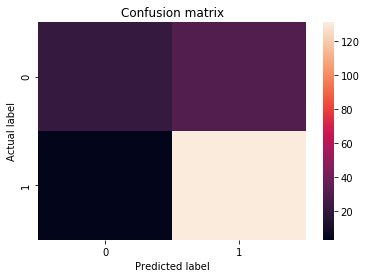

In [57]:
sns.heatmap(pd.DataFrame(confusion_matrix(test_y,LG_Pred)))
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
